In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import scipy.stats as stats

#import packages

In [3]:
def get_derivative_growth_rate(well, df, tmax=30):
    # well : a tuple of the format (row, col)
    # source : DataFrame where well was measured
    # tmax : defines the interval in which the function will measure the growth rate, from t=0 to t=tmax
    
    df_cols = [ x for x in list(df.index) if x<=tmax]
    # define time range
    
    df_data = df.loc[df_cols]
    # select the subset of the DataFrame in the selected timerange
    data = df_data[(well[0]+str(well[1]))]
    # 

    data_diff = data.diff()*4
    
    get_top_5 = data_diff.nlargest(5)
    
    growth_rate = np.median(get_top_5)
    std_err = np.std(get_top_5)
    
    return growth_rate, std_err

In [4]:
def format_table(imported_df):
    
    rename_dict = {}


    for col_name in imported_df.columns:
        to_hours = np.float64(col_name.strip('s'))/(60*60)
        rename_dict[col_name] = to_hours
    
    imported_df.rename(columns = rename_dict, inplace=True)

In [5]:
def get_growth_rate_dict(df):
    
    growth_rate_dict = {}
    
    for well in list(df.columns):
    
        row = well[0]
        col = int(well[1:])

        growth_rate = get_derivative_growth_rate((row, col), df, tmax=24)

        growth_rate_dict[well] = growth_rate[0]
        
    return growth_rate_dict
            

In [6]:
DMS_v2_score = pd.read_csv('./miseq_single_col/DMSv2_scores.csv', sep=',', index_col=0)

DMS_v2_score

,codon,wt,measured,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,...,mat_alpha_3_3_norm,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score,overall_median,crossed_pool_median
0,2,V,*,-4.627119,-3.826984,-4.577480,NaN,NaN,NaN,NaN,...,NaN,-0.019855,NaN,NaN,0.022385,NaN,NaN,-0.197819,0.001265,0.004287
1,2,V,G,-5.157296,-4.373192,-5.123687,NaN,NaN,NaN,NaN,...,NaN,-0.113607,NaN,NaN,-0.061287,NaN,NaN,-0.163936,-0.087447,-0.102027
2,2,V,A,-4.801714,-4.001580,-4.752075,NaN,NaN,NaN,NaN,...,NaN,-0.049823,NaN,NaN,0.028901,NaN,NaN,-0.067115,-0.010461,-0.029696
3,2,V,V,-5.277176,-3.477042,-3.642575,NaN,NaN,NaN,NaN,...,NaN,0.072400,NaN,NaN,-0.083743,NaN,NaN,-0.182365,-0.005671,-0.087058
4,2,V,L,-4.899342,-4.099208,-4.831206,NaN,NaN,NaN,NaN,...,NaN,-0.063405,NaN,NaN,0.006310,NaN,NaN,-0.176187,-0.028548,-0.048699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,-5.074609,...,-0.180542,NaN,NaN,-0.192846,NaN,NaN,-0.140922,-0.618938,-0.166884,-0.179591
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,-4.077485,...,-0.093036,NaN,NaN,-0.019404,NaN,NaN,-0.088460,-0.255429,-0.053932,-0.019404
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,-4.705405,...,-0.113147,NaN,NaN,-0.128626,NaN,NaN,-0.108890,-0.553013,-0.118758,-0.108890
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,-3.088172,...,0.440530,NaN,NaN,0.095715,NaN,NaN,0.410763,-0.613846,0.253239,0.152679


In [7]:
def get_mutant_DMS_score(mutant, score_source):
    # mutant format example: A23N
    # score_source is the column af the DMS df
    
    if mutant in ['NaN', 'wt', 'delta']:
        score = np.nan
        
    else:
    
        codon = int(mutant[1:-1])
        measured = mutant[-1]

        DMS_slice = DMS_v2_score[(DMS_v2_score['codon']==codon) & (DMS_v2_score['measured'] == measured)]

        score = float(DMS_slice[score_source])
    
    
    return score


get_mutant_DMS_score('E158D', 'FC_score')

-0.613846036

In [8]:
mat_a_plan = {'A1':'NaN',   'A2':'G72P', 'A3':'C94D',  'A4':'D155A', 'A5':'A59H', 'A6':'T60F',
              'B1':'R53I',  'B2':'R73G', 'B3':'A97F',  'B4':'D155S', 'B5':'T60F', 'B6':'L74Q',
              'C1':'R53D',  'C2':'NaN',  'C3':'M100W', 'C4':'I156P', 'C5':'T60R', 'C6':'E75R',
              'D1':'H62C',  'D2':'Y79S', 'D3':'Y101H', 'D4':'A23N',  'D5':'L61F', 'D6':'NaN',
              'E1':'E64V',  'E2':'Y79H', 'E3':'T124Y', 'E4':'G29Q',  'E5':'NaN',  'E6':'delta',
              'F1':'E64C',  'F2':'Y79K', 'F3':'E135D', 'F4':'N39F',  'F5':'S66M', 'F6':'NaN',
              'G1':'E64S',  'G2':'Y79E', 'G3':'R136I', 'G4':'S89V',  'G5':'E69V', 'G6':'wt',
              'H1':'R136I', 'H2':'M93G', 'H3':'F153*', 'H4':'I98L',  'H5':'C71A', 'H6':'NaN'}
#D4 dubious

mat_alpha_plan = {'A1':'G14*', 'A2':'G72P', 'A3':'A97F',  'A4':'D155A', 'A5':'A59H', 'A6':'C71Y',
              'B1':'R53I', 'B2':'R73G', 'B3':'M100W', 'B4':'D155S', 'B5':'T60F', 'B6':'L74Q',
              'C1':'R53D', 'C2':'L74P', 'C3':'C94D',  'C4':'I156P', 'C5':'T60R', 'C6':'E75R',
              'D1':'H62C', 'D2':'Y79S', 'D3':'Y101H', 'D4':'A23N',  'D5':'L61F', 'D6':'G76M',
              'E1':'E64V', 'E2':'Y79H', 'E3':'T124Y', 'E4':'G29Q',  'E5':'I65F', 'E6':'delta',
              'F1':'E64C', 'F2':'Y79K', 'F3':'D134C', 'F4':'N39F',  'F5':'S66M', 'F6':'G76Y',
              'G1':'E64S', 'G2':'Y79E', 'G3':'R136I', 'G4':'S89V',  'G5':'E69V', 'G6':'wt',
              'H1':'E69L', 'H2':'M93G', 'H3':'F153*', 'H4':'I98L',  'H5':'C71A', 'H6':'G76H'}

In [9]:
FC_100 = pd.read_excel('./growth_curves/lofxlof_validations_hap_FC_100.xlsx', index_col=0)
CY_200 = pd.read_excel('./growth_curves/lofxlof_validations_hap_CY_200.xlsx', index_col=0)
CY_20 = pd.read_excel('./growth_curves/lofxlof_validations_hap_CY_20.xlsx', index_col=0)

for df in [FC_100, CY_200, CY_20]:
    
    df = format_table(df)

FC_100 = FC_100.T
CY_200 = CY_200.T
CY_20 =  CY_20.T

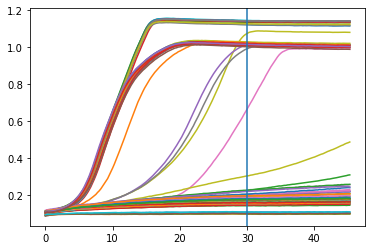

In [10]:
for well in CY_20.columns:
    plt.plot(CY_20[well])
    
plt.axvline(30)

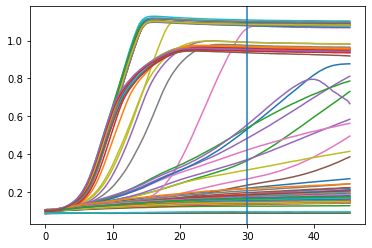

In [11]:
for well in CY_200.columns:
    plt.plot(CY_200[well])
    
plt.axvline(30)

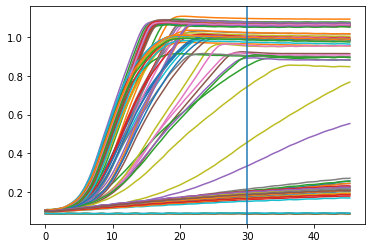

In [12]:
for well in FC_100.columns:
    plt.plot(FC_100[well])
    
plt.axvline(30)

In [13]:
growth_rate_FC_100 = get_growth_rate_dict(FC_100)
growth_rate_CY_200 = get_growth_rate_dict(CY_200)
growth_rate_CY_20 = get_growth_rate_dict(CY_20)


#print(growth_rate_FC_100)

In [14]:
index_well_dict = {}
mutant_array_a_dict = {}
mutant_dict_a = {}

mutant_array_alpha_dict = {}
mutant_dict_alpha = {}

FC_100_dict_a = {}
CY_200_dict_a = {}
CY_20_dict_a = {}

FC_100_dict_alpha = {}
CY_200_dict_alpha = {}
CY_20_dict_alpha = {}

index_pos = 0

for col in range(1,7):
    
    for row in ['A','B', 'C', 'D', 'E', 'F', 'G', 'H']:
        
        well = row+str(col)
        
        index_well_dict[index_pos] = well
        # store well information
        
        
        mutant_array_a_dict[index_pos] = well
        mutant_dict_a[index_pos] = mat_a_plan[well]
        FC_100_dict_a[index_pos] = growth_rate_FC_100[well]
        CY_200_dict_a[index_pos] = growth_rate_CY_200[well]
        CY_20_dict_a[index_pos] = growth_rate_CY_20[well]
        
        
        # add growth rates
        
        mutant_array_alpha_dict[index_pos] = well
        mutant_dict_alpha[index_pos] = mat_alpha_plan[well]
        FC_100_dict_alpha[index_pos] = growth_rate_FC_100[row+str(col+6)]
        CY_200_dict_alpha[index_pos] = growth_rate_CY_200[row+str(col+6)]
        CY_20_dict_alpha[index_pos] = growth_rate_CY_20[row+str(col+6)]
            
            
        
        
        
                
        index_pos+=1
        

hap_growth_rate_df = pd.concat([pd.Series(index_well_dict, name='well'), pd.Series(mutant_array_a_dict, name='mat_a_pos')], axis=1)
hap_growth_rate_df['mutant_a'] = pd.Series(mutant_dict_a, dtype=str)
hap_growth_rate_df['FC_100_a'] = pd.Series(FC_100_dict_a)
hap_growth_rate_df['CY_200_a'] = pd.Series(CY_200_dict_a)
hap_growth_rate_df['CY_20_a'] = pd.Series(CY_20_dict_a)


hap_growth_rate_df['mutant_alpha'] = pd.Series(mutant_dict_alpha, dtype=str)
hap_growth_rate_df['FC_100_alpha'] = pd.Series(FC_100_dict_alpha)
hap_growth_rate_df['CY_200_alpha'] = pd.Series(CY_200_dict_alpha)
hap_growth_rate_df['CY_20_alpha'] = pd.Series(CY_20_dict_alpha)



hap_growth_rate_df.head()

,well,mat_a_pos,mutant_a,FC_100_a,CY_200_a,CY_20_a,mutant_alpha,FC_100_alpha,CY_200_alpha,CY_20_alpha
0,A1,A1,NaN,0.00080,0.00150,0.00648,G14*,0.10480,0.00352,0.00932
1,B1,B1,R53I,0.09772,0.00380,0.00660,R53I,0.09212,0.00320,0.00740
2,C1,C1,R53D,0.10252,0.00348,0.00988,R53D,0.10448,0.00388,0.00912
3,D1,D1,H62C,0.10312,0.08272,0.03908,H62C,0.10400,0.00332,0.00740
4,E1,E1,E64V,0.10260,0.00324,0.00960,E64V,0.10440,0.00340,0.00628


In [15]:
empty_wells = [0, 10, 36, 43, 45, 47]

for ind in empty_wells:
    for col in ['FC_100_a', 'CY_200_a', 'CY_20_a']:
        hap_growth_rate_df.at[ind, col] = np.NaN

hap_growth_rate_df.head(100)

,well,mat_a_pos,mutant_a,FC_100_a,CY_200_a,CY_20_a,mutant_alpha,FC_100_alpha,CY_200_alpha,CY_20_alpha
0,A1,A1,NaN,NaN,NaN,NaN,G14*,0.10480,0.00352,0.00932
1,B1,B1,R53I,0.09772,0.00380,0.00660,R53I,0.09212,0.00320,0.00740
2,C1,C1,R53D,0.10252,0.00348,0.00988,R53D,0.10448,0.00388,0.00912
3,D1,D1,H62C,0.10312,0.08272,0.03908,H62C,0.10400,0.00332,0.00740
4,E1,E1,E64V,0.10260,0.00324,0.00960,E64V,0.10440,0.00340,0.00628
5,F1,F1,E64C,0.10200,0.00412,0.00800,E64C,0.10320,0.00300,0.00772
6,G1,G1,E64S,0.10028,0.00448,0.00948,E64S,0.10140,0.00348,0.00728
7,H1,H1,R136I,0.08312,0.02112,0.01072,E69L,0.07860,0.00532,0.00660
8,A2,A2,G72P,0.09968,0.00412,0.00552,G72P,0.09060,0.00408,0.00728
9,B2,B2,R73G,0.08532,0.00444,0.00788,R73G,0.07404,0.00420,0.00784


In [18]:
hap_growth_rate_df['FC_score_IC50_a'] = hap_growth_rate_df.apply(lambda x: get_mutant_DMS_score(x.mutant_a, 'FC_score'), axis=1)
hap_growth_rate_df['FC_score_IC50_alpha'] = hap_growth_rate_df.apply(lambda x: get_mutant_DMS_score(x.mutant_alpha, 'FC_score'), axis=1)

hap_growth_rate_df['FC_score_100_a'] = hap_growth_rate_df.apply(lambda x: get_mutant_DMS_score(x.mutant_a, 'overall_median'), axis=1)
hap_growth_rate_df['FC_score_100_alpha'] = hap_growth_rate_df.apply(lambda x: get_mutant_DMS_score(x.mutant_alpha, 'overall_median'), axis=1)





hap_growth_rate_df

,well,mat_a_pos,mutant_a,FC_100_a,CY_200_a,CY_20_a,mutant_alpha,FC_100_alpha,CY_200_alpha,CY_20_alpha,FC_score_IC50_a,FC_score_IC50_alpha,FC_score_100_a,FC_score_100_alpha
0,A1,A1,NaN,NaN,NaN,NaN,G14*,0.10480,0.00352,0.00932,NaN,0.949734,NaN,0.935475
1,B1,B1,R53I,0.09772,0.00380,0.00660,R53I,0.09212,0.00320,0.00740,0.966067,0.966067,0.928732,0.928732
2,C1,C1,R53D,0.10252,0.00348,0.00988,R53D,0.10448,0.00388,0.00912,1.032346,1.032346,1.108824,1.108824
3,D1,D1,H62C,0.10312,0.08272,0.03908,H62C,0.10400,0.00332,0.00740,0.995737,0.995737,1.125737,1.125737
4,E1,E1,E64V,0.10260,0.00324,0.00960,E64V,0.10440,0.00340,0.00628,1.007457,1.007457,1.047183,1.047183
5,F1,F1,E64C,0.10200,0.00412,0.00800,E64C,0.10320,0.00300,0.00772,0.981935,0.981935,1.028532,1.028532
6,G1,G1,E64S,0.10028,0.00448,0.00948,E64S,0.10140,0.00348,0.00728,0.997316,0.997316,1.111080,1.111080
7,H1,H1,R136I,0.08312,0.02112,0.01072,E69L,0.07860,0.00532,0.00660,0.926609,0.946809,0.535743,0.598206
8,A2,A2,G72P,0.09968,0.00412,0.00552,G72P,0.09060,0.00408,0.00728,0.957109,0.957109,0.614988,0.614988
9,B2,B2,R73G,0.08532,0.00444,0.00788,R73G,0.07404,0.00420,0.00784,0.902137,0.902137,0.344910,0.344910


In [19]:
hap_growth_rate_df.at[44,'FC_score_IC50_a'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']=='*']['FC_score'])
hap_growth_rate_df.at[44,'FC_score_IC50_alpha'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']=='*']['FC_score'])

hap_growth_rate_df.at[44,'FC_score_100_a'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']=='*']['overall_median'])
hap_growth_rate_df.at[44,'FC_score_100_alpha'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']=='*']['overall_median'])


hap_growth_rate_df.at[46,'FC_score_IC50_a'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']==DMS_v2_score['wt']]['FC_score'])
hap_growth_rate_df.at[46,'FC_score_IC50_alpha'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']==DMS_v2_score['wt']]['FC_score'])

hap_growth_rate_df.at[46,'FC_score_100_a'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']==DMS_v2_score['wt']]['FC_score'])
hap_growth_rate_df.at[46,'FC_score_100_alpha'] = np.nanmedian(DMS_v2_score[DMS_v2_score['measured']==DMS_v2_score['wt']]['FC_score'])

In [20]:
# as H62C mat a is an outlier. we exclude it from further analysis
hap_growth_rate_df.at[3,'FC_100_a'] = np.NaN
hap_growth_rate_df.at[3,'CY_200_a'] = np.NaN
hap_growth_rate_df.at[3,'CY_20_a'] = np.NaN


In [21]:
same_mutants = hap_growth_rate_df[hap_growth_rate_df['mutant_a'] == hap_growth_rate_df['mutant_alpha']]

In [22]:
len(same_mutants)

36

35 36
35 36
35 36
42 41
48 48
47 48


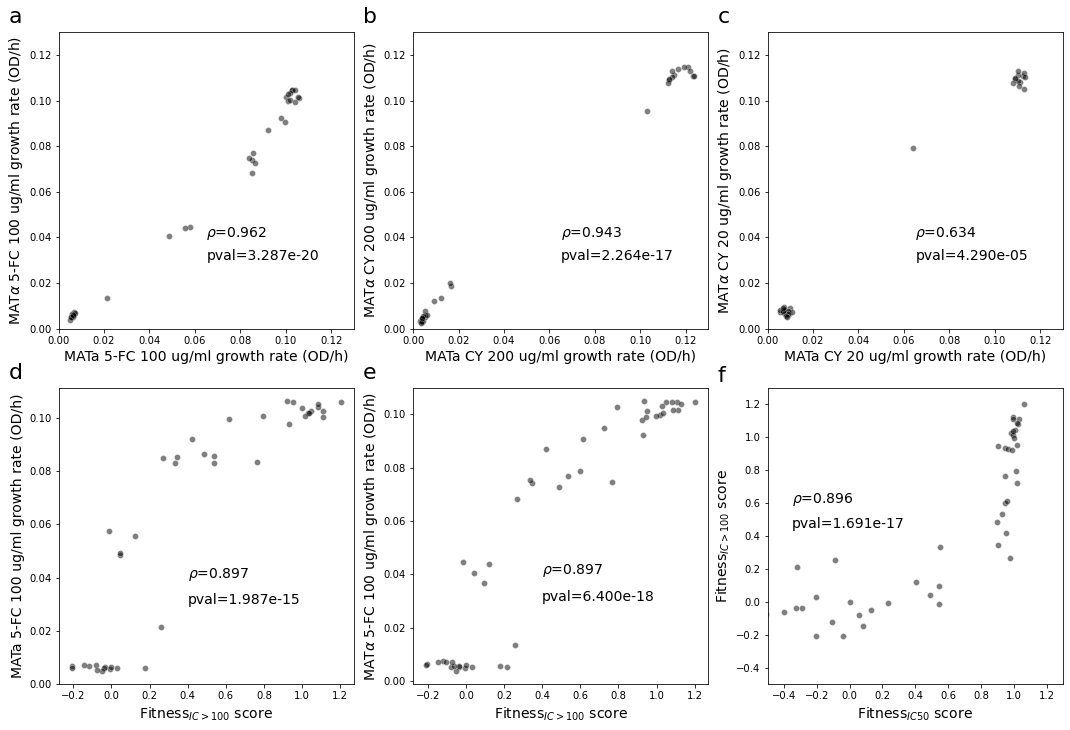

In [23]:
plt.figure(figsize = (18,12))


####################################
plt.subplot(231)
#plt.title('5-FC 100 ug/ml', fontsize=14)
plt.xlabel('MATa 5-FC 100 ug/ml growth rate (OD/h)', fontsize=14)
plt.ylabel(r'MAT$\alpha$ 5-FC 100 ug/ml growth rate (OD/h)', fontsize=14)
plt.xlim(0,0.13)
plt.ylim(0,0.13)

ax = sns.scatterplot(data=same_mutants, x='FC_100_a', y='FC_100_alpha', color='k', alpha=0.5)
vals = stats.spearmanr(same_mutants['FC_100_a'], same_mutants['FC_100_alpha'], nan_policy='omit')
plt.text(0.065,0.04, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.065,0.03, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

plt.text(-0.17, 1.03, 'a', transform=ax.transAxes, fontsize=22)


print(len(same_mutants['FC_100_a'].dropna()), len(same_mutants['FC_100_alpha'].dropna()))



####################################
plt.subplot(232)
#plt.title('Cyto 200 ug/ml', fontsize=14)
plt.xlabel('MATa CY 200 ug/ml growth rate (OD/h)', fontsize=14)
plt.ylabel(r'MAT$\alpha$ CY 200 ug/ml growth rate (OD/h)', fontsize=14)
plt.xlim(0,0.13)
plt.ylim(0,0.13)

ax = sns.scatterplot(data=same_mutants, x='CY_200_a', y='CY_200_alpha', color='k', alpha=0.5)
vals = stats.spearmanr(same_mutants['CY_200_a'], same_mutants['CY_200_alpha'], nan_policy='omit')
plt.text(0.065,0.04, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.065,0.03, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

plt.text(-0.17, 1.03, 'b', transform=ax.transAxes, fontsize=22)


print(len(same_mutants['CY_200_a'].dropna()), len(same_mutants['CY_200_alpha'].dropna()))


####################################
plt.subplot(233)
#plt.title('Cyto 20 ug/ml', fontsize=14)
plt.xlabel('MATa CY 20 ug/ml growth rate (OD/h)', fontsize=14)
plt.ylabel(r'MAT$\alpha$ CY 20 ug/ml growth rate (OD/h)', fontsize=14)
plt.xlim(0,0.13)
plt.ylim(0,0.13)


ax = sns.scatterplot(data=same_mutants, x='CY_20_a', y='CY_20_alpha', color='k', alpha=0.5)
vals = stats.spearmanr(same_mutants['CY_20_a'], same_mutants['CY_20_alpha'], nan_policy='omit')
plt.text(0.065,0.04, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.065,0.03, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

plt.text(-0.17, 1.03, 'c', transform=ax.transAxes, fontsize=22)


print(len(same_mutants['CY_20_a'].dropna()), len(same_mutants['CY_20_alpha'].dropna()))


####################################

plt.subplot(234)


ax= sns.scatterplot(data=hap_growth_rate_df, x='FC_score_100_a', y='FC_100_a', color='k', alpha=0.5)
plt.xlabel('Fitness$_{IC>100}$ score', fontsize=14)
plt.ylabel('MATa 5-FC 100 ug/ml growth rate (OD/h)', fontsize=14)

vals = stats.spearmanr(hap_growth_rate_df['FC_score_100_a'], hap_growth_rate_df['FC_100_a'], nan_policy='omit')
plt.text(0.4,0.04, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.4,0.03, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)
print(len(hap_growth_rate_df['FC_score_100_a'].dropna()), len(hap_growth_rate_df['FC_100_a'].dropna()))

plt.text(-0.17, 1.03, 'd', transform=ax.transAxes, fontsize=22)



plt.subplot(235)

####################################
ax = sns.scatterplot(data=hap_growth_rate_df, x='FC_score_100_alpha', y='FC_100_alpha', color='k', alpha=0.5)
plt.xlabel('Fitness$_{IC>100}$ score', fontsize=14)
plt.ylabel(r'MAT$\alpha$ 5-FC 100 ug/ml growth rate (OD/h)', fontsize=14)

plt.text(-0.17, 1.03, 'e', transform=ax.transAxes, fontsize=22)


vals = stats.spearmanr(hap_growth_rate_df['FC_score_100_alpha'], hap_growth_rate_df['FC_100_alpha'], nan_policy='omit')
plt.text(0.4,0.04, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.4,0.03, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)
print(len(hap_growth_rate_df['FC_score_100_alpha'].dropna()), len(hap_growth_rate_df['FC_100_alpha'].dropna()))


####################################
plt.subplot(236)

ax = sns.scatterplot(data=hap_growth_rate_df, x='FC_score_IC50_alpha', y='FC_score_100_alpha', color='k', alpha=0.5)
plt.xlabel('Fitness$_{IC50}$ score', fontsize=14)
plt.ylabel('Fitness$_{IC>100}$ score', fontsize=14)

plt.text(-0.17, 1.02, 'f', transform=ax.transAxes, fontsize=22)

vals = stats.spearmanr(hap_growth_rate_df['FC_score_IC50_alpha'], hap_growth_rate_df['FC_score_100_alpha'], nan_policy='omit')
plt.text(-0.35,0.6, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(-0.35,0.45, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)
plt.xlim(-0.5,1.3)
plt.ylim(-0.5,1.3)

print(len(hap_growth_rate_df['FC_score_IC50_alpha'].dropna()), len(hap_growth_rate_df['FC_score_100_alpha'].dropna()))


#plt.savefig('./figures/haploid_KI_phenotypes.svg', format='svg', dpi=300, bbox_inches='tight')

In [31]:
hap_growth_rate_df

,well,mat_a_pos,mutant_a,FC_100_a,CY_200_a,CY_20_a,mutant_alpha,FC_100_alpha,CY_200_alpha,CY_20_alpha,FC_score_IC50_a,FC_score_IC50_alpha,FC_score_100_a,FC_score_100_alpha,type_pos_a,type_pos_alpha,residue_type
0,A1,A1,NaN,NaN,NaN,NaN,G14*,0.10480,0.00352,0.00932,NaN,0.949734,NaN,0.935475,NaN,unk,NaN
1,B1,B1,R53I,0.09772,0.00380,0.00660,R53I,0.09212,0.00320,0.00740,0.966067,0.966067,0.928732,0.928732,catalytic,catalytic,catalytic
2,C1,C1,R53D,0.10252,0.00348,0.00988,R53D,0.10448,0.00388,0.00912,1.032346,1.032346,1.108824,1.108824,catalytic,catalytic,catalytic
3,D1,D1,H62C,NaN,NaN,NaN,H62C,0.10400,0.00332,0.00740,0.995737,0.995737,1.125737,1.125737,catalytic,catalytic,catalytic
4,E1,E1,E64V,0.10260,0.00324,0.00960,E64V,0.10440,0.00340,0.00628,1.007457,1.007457,1.047183,1.047183,catalytic,catalytic,catalytic
5,F1,F1,E64C,0.10200,0.00412,0.00800,E64C,0.10320,0.00300,0.00772,0.981935,0.981935,1.028532,1.028532,catalytic,catalytic,catalytic
6,G1,G1,E64S,0.10028,0.00448,0.00948,E64S,0.10140,0.00348,0.00728,0.997316,0.997316,1.111080,1.111080,catalytic,catalytic,catalytic
7,H1,H1,R136I,0.08312,0.02112,0.01072,E69L,0.07860,0.00532,0.00660,0.926609,0.946809,0.535743,0.598206,unk,interface,unk
8,A2,A2,G72P,0.09968,0.00412,0.00552,G72P,0.09060,0.00408,0.00728,0.957109,0.957109,0.614988,0.614988,interface,interface,interface
9,B2,B2,R73G,0.08532,0.00444,0.00788,R73G,0.07404,0.00420,0.00784,0.902137,0.902137,0.344910,0.344910,interface,interface,interface


In [46]:
#hap_growth_rate_df.to_csv('./hap_validation_growth_rates.csv', sep=',')